In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries

import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as st


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True)

plt.rcParams["figure.figsize"] = (12, 6)  # Change matplotlib Box Size 
#if we don't set these we will get scientific notations
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("seaborn")

In [ ]:
avg_cdeliv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/Processed data/Merged files for presentation/avg_cdeliv.csv')
num_deliv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/Processed data/Merged files for presentation/num_deliv.csv')
text_files_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/Processed data/Merged files for presentation/text_files_data.csv')

In [ ]:
#functions and processing

#add canton name
cantons_dict = {'TG':'Thurgau', 'GR':'Graubünden', 'LU':'Luzern', 'BE':'Bern', 'VS':'Valais', 
                'BL':'Basel-Landschaft', 'SO':'Solothurn', 'VD':'Vaud', 'SH':'Schaffhausen', 'ZH':'Zürich', 
                'AG':'Aargau', 'UR':'Uri', 'NE':'Neuchâtel', 'TI':'Ticino', 'SG':'St. Gallen', 'GE':'Genève', 
                'GL':'Glarus', 'JU':'Jura', 'ZG':'Zug', 'OW':'Obwalden', 'FR':'Fribourg', 'SZ':'Schwyz', 
                'AR':'Appenzell Ausserrhoden', 'AI':'Appenzell Innerrhoden', 'NW':'Nidwalden', 'BS':'Basel-Stadt'}


avg_cdeliv["canton_name"] = avg_cdeliv["Canton of patients"].map(cantons_dict)
num_deliv["canton_name"] = num_deliv["Canton"].map(cantons_dict)

In [ ]:
text_files_data = text_files_data.drop(columns=['sex'])

# Disease Data

In [ ]:
text_files_data.iloc[:, 2:6] = text_files_data.iloc[:, 2:6].replace([np.nan, '*', '-', ' ', '', 'None', 'True', 'False', None], 0)

In [ ]:
# text_files_data['year'] = text_files_data['year'].astype(str)

# import datetime
# text_files_data['year'] = pd.to_datetime(text_files_data.year, format='%Y')

In [ ]:
text_files_data.head()

,diagnosis,year,altegrp,casesch,deathch,pch,age,code,disease_group
0,A7_07_M Isolated open aortic valve replacement...,2008,0.0000,559.0000,18.0000,3.2200,19-100,A7_07_M,cardiac
1,A7_07_M Isolated open aortic valve replacement...,2009,0.0000,699.0000,19.0000,2.7182,19-100,A7_07_M,cardiac
2,A7_07_M Isolated open aortic valve replacement...,2010,0.0000,789.0000,14.0000,1.7744,19-100,A7_07_M,cardiac
3,A7_07_M Isolated open aortic valve replacement...,2011,0.0000,904.0000,23.0000,2.5442,19-100,A7_07_M,cardiac
4,A7_07_M Isolated open aortic valve replacement...,2012,0.0000,902.0000,22.0000,2.4390,19-100,A7_07_M,cardiac


In [ ]:
urinary = text_files_data[text_files_data['disease_group'] == 'Diseases of the urinary tract and male genitalia']
bone = text_files_data[text_files_data['disease_group'] == 'Diseases of the bones, joints, connective tissues']
specialized_medicine = text_files_data[text_files_data['disease_group'] == 'Highly specialized medicine']
cardiac = text_files_data[text_files_data['disease_group'] == 'cardiac']
nervous = text_files_data[text_files_data['disease_group'] == 'Nervous system, cerebrovascular accident (stroke)']
lung = text_files_data[text_files_data['disease_group'] == 'Lung diseases']
gynecology = text_files_data[text_files_data['disease_group'] == 'Gynecology and obstetrics']
abdominal = text_files_data[text_files_data['disease_group'] == 'Abdominal organs disease']
vascular = text_files_data[text_files_data['disease_group'] == 'Vascular Diseases']
skin = text_files_data[text_files_data['disease_group'] == 'Skin disorders']
geriatric = text_files_data[text_files_data['disease_group'] == 'Geriatric Medicine']
palliative = text_files_data[text_files_data['disease_group'] == 'Palliative Medicine']


In [ ]:
def corr_annot(x, y, ax=None, **kws):
    """Annotate a plot w/ the correlation coefficient."""
    r, _ = st.pearsonr(x, y)
    ax = ax or plt.gca()
    fontsizes = {range(0,21):"medium", range(21,51):'large', range(51,81):'x-large', range(90,101):'xx-large'}

    if r > 0:
        font_size = [fontsize for bound,fontsize in fontsizes.items() if round(abs(r), 1)*100 in bound][0]
        ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes, fontsize = font_size)

In [ ]:
urinary_y = urinary.groupby(by='year').sum().reset_index()
bone_y = bone.groupby(by='year').sum().reset_index()
specialized_medicine_y = specialized_medicine.groupby(by='year').sum().reset_index()
cardiac_y = cardiac.groupby(by='year').sum().reset_index()
nervous_y = nervous.groupby(by='year').sum().reset_index()
lung_y = lung.groupby(by='year').sum().reset_index()
gynecology_y = gynecology.groupby(by='year').sum().reset_index()
abdominal_y = abdominal.groupby(by='year').sum().reset_index()
vascular_y = vascular.groupby(by='year').sum().reset_index()
skin_y = skin.groupby(by='year').sum().reset_index()
geriatric_y = geriatric.groupby(by='year').sum().reset_index()
palliative_y = palliative.groupby(by='year').sum().reset_index()

# Linear regression

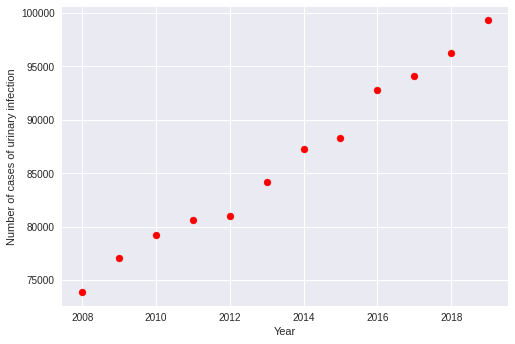

In [ ]:
year = urinary_y['year'].values
cases = urinary_y['casesch'].values
n = np.size(year)

plt.scatter(year, cases, color = 'red')
plt.xlabel("Year")
plt.ylabel("Number of cases of urinary infection")
plt.show()

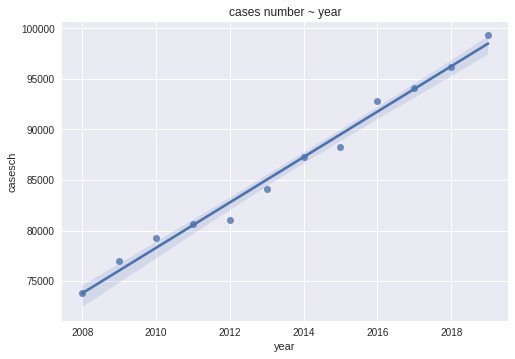

In [ ]:
sns.regplot(data = urinary_y, x = "year", y = "casesch", lowess=False).set(title='cases number ~ year');

[Text(817.7130434782609, 0.5, ''),
 Text(0.5, 1.0, 'Number of gynecological diseases')]

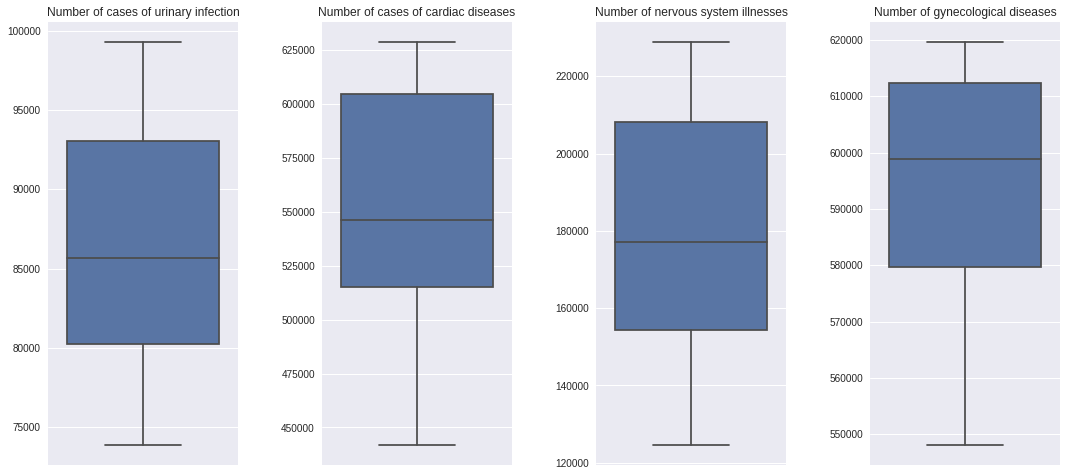

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize = (16,8));
fig.tight_layout(pad = 4)

sns.boxplot(y='casesch', data=urinary_y, ax=axes[0]).set(title = "Number of cases of urinary infection", ylabel = None)
sns.boxplot(y='casesch', data=cardiac_y, ax=axes[1]).set(title = "Number of cases of cardiac diseases", ylabel = None)
sns.boxplot(y='casesch', data=nervous_y, ax=axes[2]).set(title = "Number of nervous system illnesses", ylabel = None)
sns.boxplot(y='casesch', data=gynecology_y, ax=axes[3]).set(title = "Number of gynecological diseases", ylabel = None)

# Simple linear regression

In [ ]:
y = urinary_y['casesch']
X = sm.add_constant(urinary_y['year'])

linear_1 = sm.OLS(y, X).fit()

print("Coefficients", linear_1.params, sep = "\n")

Coefficients
const   -4432302.2611
year        2244.0734
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
linear_1.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                casesch   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     806.7
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           6.81e-11
Time:                        07:24:39   Log-Likelihood:                -98.145
No. Observations:                  12   AIC:                             200.3
Df Residuals:                      10   BIC:                             201.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.432e+06   1.59e+05    -27.861      0.000   -4.79e+06   -4.08e+06
year        2244.0734     79.009     28.403      0.000    2068.029    2420.118
==============================================================================
Omnibus:                        1.353   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.964
Skew:                          -0.628   Prob(JB):                        0.617
Kurtosis:                       2.409   Cond. No.                     1.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

our model equation for urinary infections

number of cases = -4432302.2611 + 2244.0734*urinary_y['year']

In [ ]:
num_cases_pred = -4432302.2611 + 2244.0734*urinary_y['year']
num_cases_pred

0    73797.1261
1    76041.1995
2    78285.2729
3    80529.3463
4    82773.4197
5    85017.4931
6    87261.5665
7    89505.6399
8    91749.7133
9    93993.7867
10   96237.8601
11   98481.9335
Name: year, dtype: float64

In [ ]:
print(linear_1.summary())

                            OLS Regression Results                            
Dep. Variable:                casesch   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     806.7
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           6.81e-11
Time:                        07:24:39   Log-Likelihood:                -98.145
No. Observations:                  12   AIC:                             200.3
Df Residuals:                      10   BIC:                             201.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.432e+06   1.59e+05    -27.861      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [ ]:
for i in [2020, 2021, 2022, 2023, 2024]:
  pred = -4432302.2611 + 2244.0734*i
  print(pred)

100726.00690000039
102970.0803000005
105214.1537000006
107458.22710000072
109702.30050000083


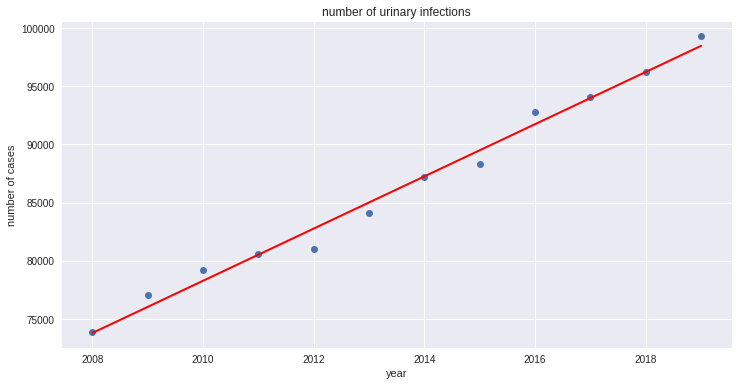

In [ ]:
# Predict values
cases_pred = linear_1.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(urinary_y['year'], urinary_y['casesch'], 'o')           # scatter plot showing actual data
plt.plot(urinary_y['year'], cases_pred, 'r', linewidth=2)   # regression line
plt.xlabel('year')
plt.ylabel('number of cases')
plt.title('number of urinary infections')

plt.show()

# Births Data

In [ ]:
num_deliv.head()

,Geographic MedStat region,Number of deliveries,Number of cesarean sections,Cesarean section rate (%),Average age deliveries,Average age cesarean sections,year,Canton,canton_name
0,Limmattal,123.0000,51.0000,41.4600,31.5000,31.3700,2007,ZH,Zürich
1,Urdorf,77.0000,24.0000,31.1700,30.0800,29.4300,2007,ZH,Zürich
2,Birmensdorf,101.0000,47.0000,46.5300,32.6700,34.2500,2007,ZH,Zürich
3,Affoltern am Albis,249.0000,77.0000,30.9200,29.5000,31.1900,2007,ZH,Zürich
4,Obfelden,101.0000,27.0000,26.7300,31.5400,35.0600,2007,ZH,Zürich


In [ ]:
deliv_years = num_deliv.groupby(['canton_name','year'])[ 'Number of deliveries', 'Number of cesarean sections'].sum().reset_index()
deliv_years

#make choropleth for each canton
#and prediction model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,canton_name,year,Number of deliveries,Number of cesarean sections
0,Aargau,2007,5363.0000,1766.0000
1,Aargau,2008,5759.0000,1901.0000
2,Aargau,2009,5676.0000,1867.0000
3,Aargau,2010,5929.0000,1993.0000
4,Aargau,2011,5992.0000,2059.0000
...,...,...,...,...
333,Zürich,2015,16242.0000,6040.0000
334,Zürich,2016,16468.0000,6126.0000
335,Zürich,2017,16434.0000,5954.0000
336,Zürich,2018,16205.0000,5787.0000


In [ ]:
deliv_years.sort_values(by='Number of deliveries', ascending = False)

,canton_name,year,Number of deliveries,Number of cesarean sections
337,Zürich,2019,31914.0000,11676.0000
77,Bern,2019,19196.0000,6162.0000
311,Vaud,2019,16648.0000,4786.0000
334,Zürich,2016,16468.0000,6126.0000
335,Zürich,2017,16434.0000,5954.0000
...,...,...,...,...
30,Appenzell Innerrhoden,2011,152.0000,42.0000
31,Appenzell Innerrhoden,2012,151.0000,43.0000
37,Appenzell Innerrhoden,2018,150.0000,44.0000
33,Appenzell Innerrhoden,2014,139.0000,36.0000


In [ ]:
swiss_deliv = num_deliv.groupby(['year'])[ 'Number of deliveries', 'Number of cesarean sections'].sum().reset_index()
swiss_deliv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,year,Number of deliveries,Number of cesarean sections
0,2007,72656.0000,23393.0000
1,2008,76340.0000,25206.0000
2,2009,75310.0000,24689.0000
3,2010,77929.0000,25528.0000
4,2011,78206.0000,26062.0000
5,2012,79602.0000,26575.0000
6,2013,81862.0000,27285.0000
7,2014,83933.0000,28318.0000
8,2015,85325.0000,28458.0000
9,2016,86684.0000,28748.0000


number  of deliveries prediction

In [ ]:
y = swiss_deliv['Number of deliveries']
X = sm.add_constant(swiss_deliv['year'])

swiss1 = sm.OLS(y, X).fit()

print("Coefficients", swiss1.params, sep = "\n")

Coefficients
const   -7888716.0330
year        3962.4505
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
swiss1.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Number of deliveries   R-squared:                       0.376
Model:                              OLS   Adj. R-squared:                  0.319
Method:                   Least Squares   F-statistic:                     6.630
Date:                  Tue, 26 Apr 2022   Prob (F-statistic):             0.0258
Time:                          07:24:39   Log-Likelihood:                -146.59
No. Observations:                    13   AIC:                             297.2
Df Residuals:                        11   BIC:                             298.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.889e+06    3.1e+06     -2.547      0.027   -1.47e+07   -1.07e+06
year        3962.4505   1538.860      2.575      0.026     575.442    7349.459
==============================================================================
Omnibus:                       20.123   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.555
Skew:                           2.022   Prob(JB):                     0.000154
Kurtosis:                       7.006   Cond. No.                     1.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

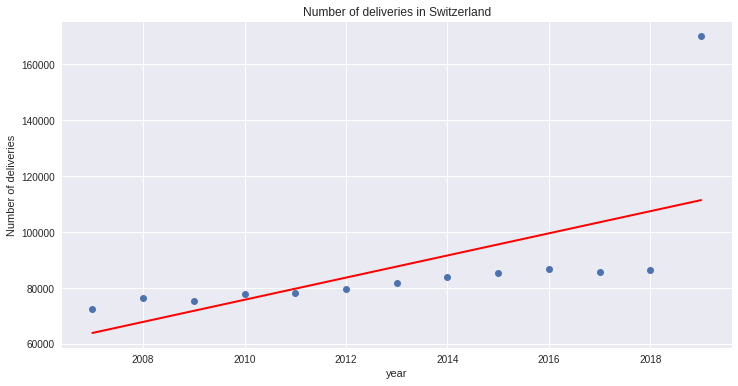

In [ ]:
# Predict values
births_swiss_pred = swiss1.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(swiss_deliv['year'], swiss_deliv['Number of deliveries'], 'o')           # scatter plot showing actual data
plt.plot(swiss_deliv['year'], births_swiss_pred, 'r', linewidth=2)   # regression line
plt.xlabel('year')
plt.ylabel('Number of deliveries')
plt.title('Number of deliveries in Switzerland')

plt.show()

number of  c section  prediction

In [ ]:
y = swiss_deliv['Number of cesarean sections']
X = sm.add_constant(swiss_deliv['year'])

swiss2 = sm.OLS(y, X).fit()

print("Coefficients", swiss2.params, sep = "\n")

Coefficients
const   -2486248.8132
year        1249.3956
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
swiss2.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Number of cesarean sections   R-squared:                       0.382
Model:                                     OLS   Adj. R-squared:                  0.326
Method:                          Least Squares   F-statistic:                     6.793
Date:                         Tue, 26 Apr 2022   Prob (F-statistic):             0.0244
Time:                                 07:24:39   Log-Likelihood:                -131.43
No. Observations:                           13   AIC:                             266.9
Df Residuals:                               11   BIC:                             268.0
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.486e+06   9.65e+05     -2.576      0.026   -4.61e+06   -3.62e+05
year        1249.3956    479.371      2.606      0.024     194.308    2304.484
==============================================================================
Omnibus:                       19.376   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.621
Skew:                           1.943   Prob(JB):                     0.000246
Kurtosis:                       6.947   Cond. No.                     1.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

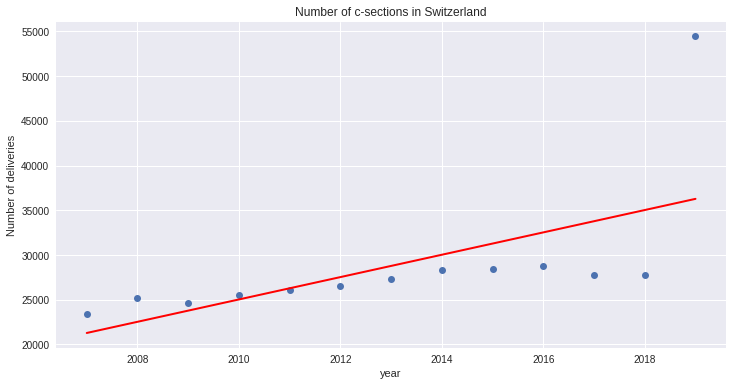

In [ ]:
# Predict values
csec_swiss_pred = swiss2.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(swiss_deliv['year'], swiss_deliv['Number of cesarean sections'], 'o')           # scatter plot showing actual data
plt.plot(swiss_deliv['year'], csec_swiss_pred, 'r', linewidth=2)   # regression line
plt.xlabel('year')
plt.ylabel('Number of deliveries')
plt.title('Number of c-sections in Switzerland')

plt.show()